In [69]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
result_directory = '/data/jpetrie/MEOPAR/SalishSea/results/remin_param_sweep_new_depth/nampisrem_zz_remin_D_DON_5.777338792472032e-08/'
tracer_file = 'SS5x5_1h_20150201_20150501_ptrc_T.nc'
mesh_mask_file = 'mesh_mask.nc'

In [71]:
tracer_dataset = xr.open_dataset(result_directory + tracer_file)
mesh_mask = xr.open_dataset(result_directory + mesh_mask_file)

In [72]:
nitrogen_tracers = ['NO3','NH4','DOC','POC','PHY','PHY2','MICZ','MYRI']

tracer_sum = np.zeros(tracer_dataset[nitrogen_tracers[0]].values.shape)

for tracer in nitrogen_tracers:
    tracer_sum = tracer_sum + tracer_dataset[tracer].values
# tracer_sum now contains total nitrogen concentration by t,z,y,x

In [73]:
# Sum across x and y coordinates. Gives 2D array with nitrogen concentration by time and depth
x_y_summed = np.sum(np.sum(tracer_sum,axis = 3),axis=2)

In [74]:
# A vector with the height of each grid element
grid_heights = np.array(mesh_mask['e3t_1d'][0])

# 2D array (time,depth) with the total quantity of nitrogen for that time and depth
grid_scaled = np.multiply(grid_heights,x_y_summed)

# Total nitrogen by time only (1D array)
depth_summed = np.sum(grid_scaled,axis = 1)

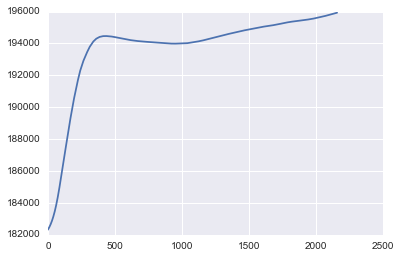

In [75]:
plt.plot(range(len(depth_summed)),depth_summed)